In [232]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.morphology import closing, square, opening, extrema
from scipy import ndimage as ndi
from scipy import misc 
import numpy as np
import os, sys

In [183]:
def MyConnComp_2016719749_201126292(binary_image, conn):
    try:
        def get_indices(num_labels, labeled_image):
            pixel_labels = []
            for lbl in range(num_labels):
                pixel_labels.append(np.where(labeled_image==lbl))                                  
            return np.array(pixel_labels)                        
        if conn==4:
            labeled_image, num_labels = label(binary_image, connectivity=1, return_num= True)
            pixel_labels = get_indices(num_labels, labeled_image)                    
        elif conn==8:
            labeled_image, num_labels = label(binary_image, connectivity=2, return_num = True)
            pixel_labels = get_indices(num_labels, labeled_image)                       
        else:
            raise Exception('Ingrese un valor de conectividad 4 0 8')
        return labeled_image, pixel_labels
    except AttributeError:
        print('La imagen no corresponde a una matrix binaria')

In [184]:
labels, pix = MyConnComp_2016719749_201126292(op, 4)

In [305]:
image = data.coins()
def eliminación_componentes(imagen, trehs):
    mask = imagen > trehs
    # apply closing to conecting pixel closer to each one and fill holes inside
    print(imagen.shape)
    bw = closing(mask, square(5))
    # apply opening to eliminate small components
    op = opening(bw, square(18))
    # label image regions
    label_image, labels =  MyConnComp_2016719749_201126292(op, 8)
    #eliminate elements with label 6 
    print(labels.shape[0]+1)
    lbl = np.random.randint(labels.shape[0]+1, size=1)
    print('Componente {} eliminado'.format(lbl))
    delete_component = np.copy(label_image)
    delete_component[label_image==lbl]=-1
    #
    original_delete = np.copy(imagen)
    original_delete[delete_component==-1]= 0
    print(original_delete.shape)
    plt.figure(figsize=(10, 6))
    #plt.suptitle('Figura 2. Objectos superpuestos', x= 0.5, y=0.99)
    plt.subplot(3,2,1)
    plt.title('Imagen original')
    plt.imshow(imagen, cmap='gray')
    plt.axis('off')
    plt.subplot(3,2,2)
    plt.title('Imagen binaria')
    plt.imshow(op, cmap='gray')
    plt.axis('off')
    plt.subplot(3,2,3)
    plt.title('Imagen compon. conexos')
    plt.imshow(label_image)
    plt.axis('off')
    plt.subplot(3,2,4)
    plt.title('Imagen sin una etiqueta')
    plt.imshow(delete_component)
    plt.axis('off')
    plt.subplot(3,2,5)
    plt.title('Imagen original sin una etiqueta')
    plt.imshow(original_delete, cmap= 'gray')
    plt.axis('off')
    ax.set_axis_off()
    plt.tight_layout()
    #plt.savefig(os.path.join(os.getcwd(),'circles.jpg'))

(303, 384)
26
Componente [18] eliminado
(303, 384)


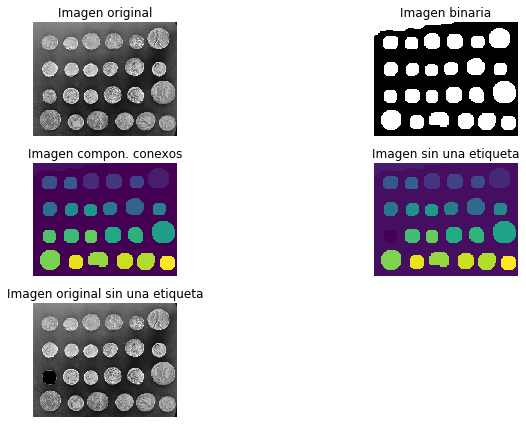

In [306]:
eliminación_componentes(image, 120)

### 4.  ¿Qué  características  deberían  tener  las  imágenes  para  que  no  se  dificulte  la  tarea  de  extraercomponentes conexos

Para que no sea dificil la extracción de componentes conexos las imagenes deben presentar poco ruido y contar con pocas clases diferentes, preferiblemente que los obectos no esten superpuestos. Por ejemplo en la figura 1 podemos obervas como las monedas son segmentadas con buena precision. Sin embargo al usar una imagen con objetos superpuestos encontramos el problema de que los componentes que estan superpuestos son clasificados como si fueran uno mismo (Ver Figura 2). 

(500, 500)


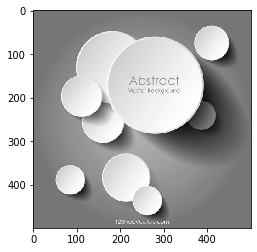

In [307]:
img_circles = data.imread('./circles.png', as_gray= True)
img_circles = img_circles * 255
img_circles = img_circles.astype('uint8')
print(img_circles.shape)
plt.imshow(img_circles, cmap= 'gray')

(500, 500)
4
Componente [2] eliminado
(500, 500)


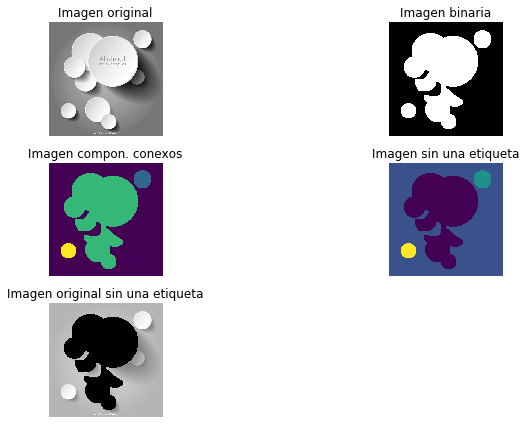

In [308]:
eliminación_componentes(img_circles, 200)

In [333]:
matrix1 = np.zeros((15,15), np.uint8)
for i in range(0,matrix1.ravel().shape[0],3):
    matrix1.ravel()[i] = 1

(-0.5, 14.5, 14.5, -0.5)

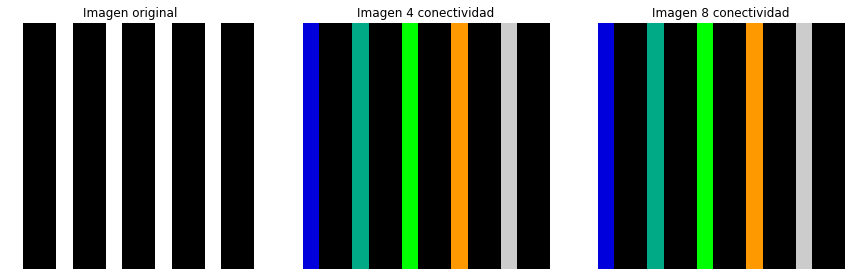

In [341]:
matrix1_conn4, labels_conn4 =  MyConnComp_2016719749_201126292(matrix1, 4)
matrix1_conn8, labels_conn8 =  MyConnComp_2016719749_201126292(matrix1, 8)
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(matrix1,cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(matrix1_conn4,cmap='nipy_spectral')
plt.title('Imagen 4 conectividad')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(matrix1_conn8,cmap='nipy_spectral')
plt.title('Imagen 8 conectividad')
plt.axis('off')

En la imagen anterior se aplico una conectividad de 4 y 8 para la misma imagen, sin embargo, debido a que la ventana de conectividad para los dos tipos es muy pequeña no alcanza considerar del mismo objecto dos rayas separadas.

(-0.5, 14.5, 14.5, -0.5)

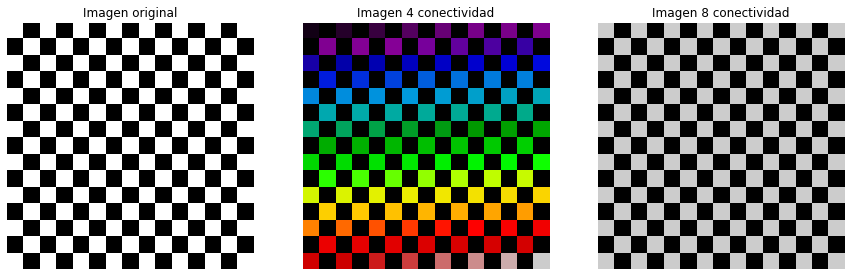

In [343]:
matrix2 = np.zeros((15,15), np.uint8)
for i in range(0,matrix2.ravel().shape[0],2):
    matrix2.ravel()[i] = 1
    
matrix2_conn4, labels2_conn4 =  MyConnComp_2016719749_201126292(matrix2, 4)
matrix2_conn8, labels2_conn8 =  MyConnComp_2016719749_201126292(matrix2, 8)
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(matrix2,cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(matrix2_conn4,cmap='nipy_spectral')
plt.title('Imagen 4 conectividad')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(matrix2_conn8,cmap='nipy_spectral')
plt.title('Imagen 8 conectividad')
plt.axis('off')

En la imagen anterior se aplico una conectividad de 4 y 8 para la misma imagen, sin embargo, debido a que la ventana de conectividad de 4-adyacencia solo tiene en cuenta los pixeles vecinos perpendiculares, el algoritmo detecto cada pixel como un componente unico. Por el contrario, la 8-adyacencia si tiene en cuenta la pixeles vecinos diagonales, por lo tanto, conecto todos los pixeles del foreground como un componente unico. 

## Problema Biomédico 

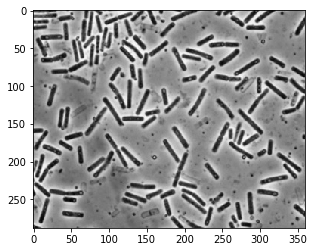

In [345]:
img_bacillus = data.imread('./bacillus.jpg', as_gray= True)
plt.imshow(img_bacillus, cmap= 'gray')

In [361]:
img_bacillus<100

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

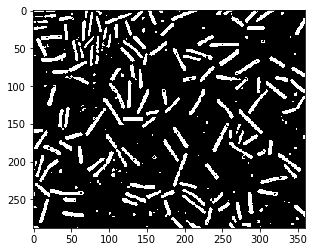

In [367]:
binary_bacillus = np.zeros_like(img_bacillus, np.uint8)
binary_bacillus[img_bacillus<120] = 1
plt.imshow(binary_bacillus, cmap= 'gray')

(-0.5, 359.5, 287.5, -0.5)

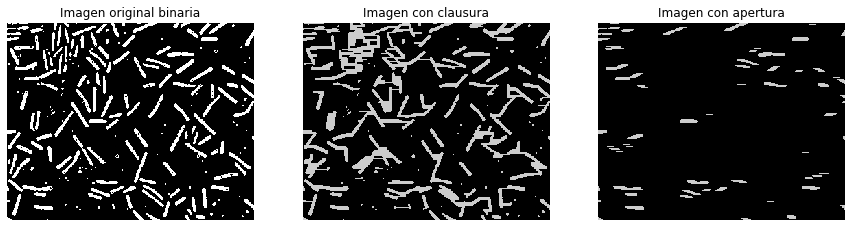

In [371]:
element_est = np.ones((1,10),np.uint8)
closing_bacillus = closing(binary_bacillus, element_est)
# apply opening to eliminate small components
op_bacillus = opening(binary_bacillus,element_est)

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(binary_bacillus,cmap='gray')
plt.title('Imagen original binaria')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(closing_bacillus,cmap='nipy_spectral')
plt.title('Imagen con clausura')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(op_bacillus,cmap='nipy_spectral')
plt.title('Imagen con apertura')
plt.axis('off')

(-0.5, 359.5, 287.5, -0.5)

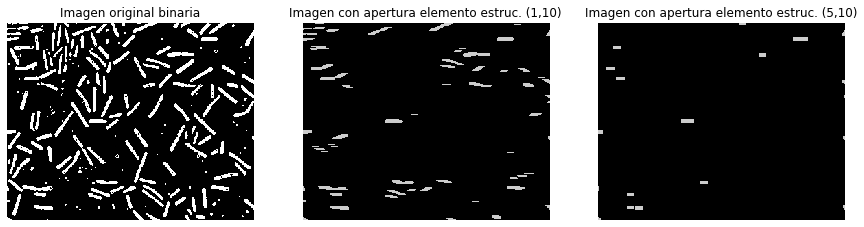

In [377]:
element_est2 = np.ones((5,10),np.uint8)
op_bacillus2 = opening(binary_bacillus, element_est2)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(binary_bacillus,cmap='gray')
plt.title('Imagen original binaria')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(op_bacillus,cmap='nipy_spectral')
plt.title('Imagen con apertura elemento estruc. (1,10)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(op_bacillus2,cmap='nipy_spectral')
plt.title('Imagen con apertura elemento estruc. (5,10)')
plt.axis('off')